In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from keras.layers import Dense,Flatten,Dropout
from keras.models import Sequential
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [2]:
df = pd.read_csv("C:/Users/KIRPAL SINGH/Downloads/sign_mnist_train.csv/sign_mnist_train.csv")

In [3]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
df.shape

(27455, 785)

In [5]:
df.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

C:\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

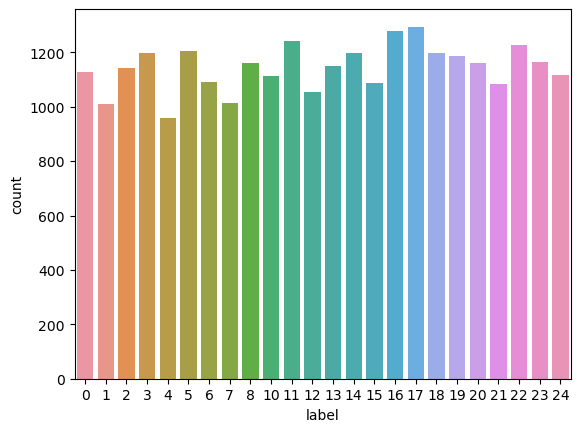

In [6]:
sns.countplot(df["label"])

In [7]:
y = df["label"]
x = df.drop(["label"],axis=1)

In [8]:
x.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [9]:
y

0         3
1         6
2         2
3         2
4        13
         ..
27450    13
27451    23
27452    18
27453    17
27454    23
Name: label, Length: 27455, dtype: int64

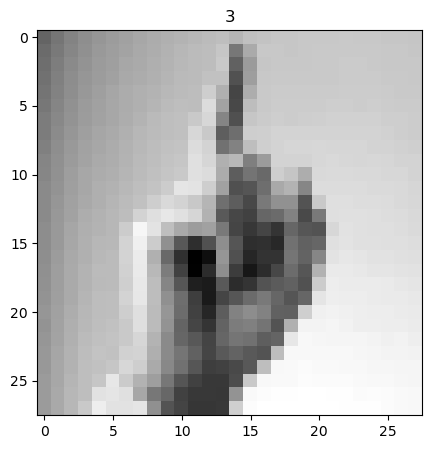

In [10]:
var = df.iloc[0,1:]
var = np.array(var)
var = var.reshape(28,28)
plt.figure(figsize=(5,5))
plt.imshow(var,cmap='gray')
plt.title(df.iloc[0,0])
plt.show()

In [11]:
standardscaler = StandardScaler()
x = standardscaler.fit_transform(x)

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [13]:
model = Sequential()
model.add(Flatten())
model.add(Dense(784,input_shape=(784,),activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(200 , activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(50,activation="relu"))
model.add(Dense(25,activation="softmax"))

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 784)               615440    
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               157000    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                10050     
                                                                 
 dense_3 (Dense)             (None, 25)                1

In [16]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=64,epochs=5)

Epoch 1/5
344/344 [==============================] - 7s 16ms/step - loss: 0.6873 - accuracy: 0.7922 - val_loss: 0.0968 - val_accuracy: 0.9758
Epoch 2/5
344/344 [==============================] - 6s 16ms/step - loss: 0.1160 - accuracy: 0.9647 - val_loss: 0.0787 - val_accuracy: 0.9765
Epoch 3/5
344/344 [==============================] - 6s 16ms/step - loss: 0.0934 - accuracy: 0.9713 - val_loss: 0.0615 - val_accuracy: 0.9805
Epoch 4/5
344/344 [==============================] - 5s 16ms/step - loss: 0.0723 - accuracy: 0.9783 - val_loss: 0.0268 - val_accuracy: 0.9920
Epoch 5/5
344/344 [==============================] - 5s 16ms/step - loss: 0.0848 - accuracy: 0.9752 - val_loss: 0.0272 - val_accuracy: 0.9924


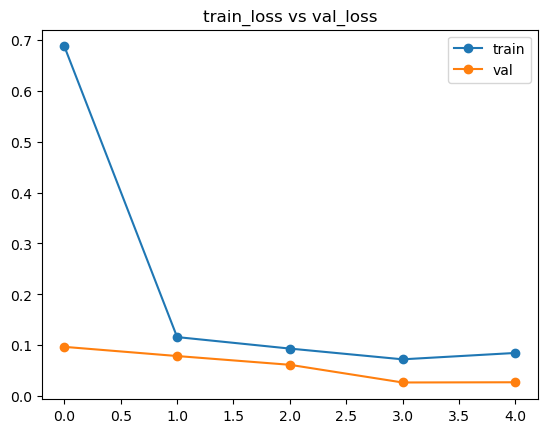

In [18]:
plt.plot(history.history["loss"],marker='o')
plt.plot(history.history["val_loss"],marker='o')
plt.title("train_loss vs val_loss")
plt.legend(["train","val"])

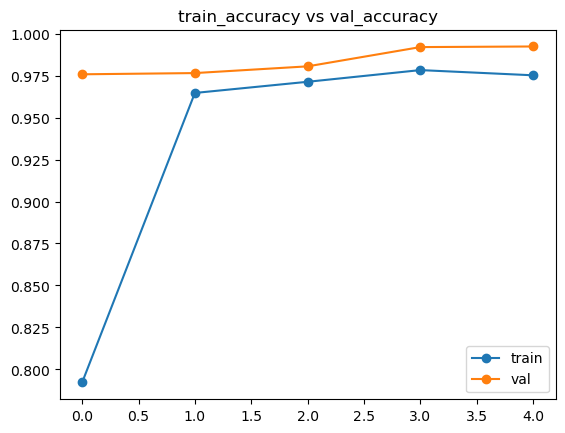

In [19]:
plt.plot(history.history["accuracy"],marker='o')
plt.plot(history.history["val_accuracy"],marker='o')
plt.title("train_accuracy vs val_accuracy")
plt.legend(["train","val"])

In [20]:
df_test = pd.read_csv("C:/Users/KIRPAL SINGH/Downloads/sign_mnist_test.csv/sign_mnist_test.csv")

In [21]:
Y = df_test["label"]
X = df_test.drop(["label"],axis=1)

In [22]:
standardscaler = StandardScaler()
X = standardscaler.fit_transform(X)

In [23]:
y_pred = model.predict(X)

225/225 [==============================] - 1s 5ms/step


In [24]:
print(classification_report(y_pred.argmax(axis=1),Y))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       372
           1       0.87      0.99      0.93       379
           2       0.91      0.74      0.81       382
           3       0.98      0.88      0.92       274
           4       0.92      0.95      0.93       482
           5       0.90      0.86      0.88       258
           6       0.85      0.78      0.81       378
           7       0.83      0.88      0.86       410
           8       0.84      0.83      0.83       290
          10       0.79      0.67      0.72       387
          11       0.69      0.82      0.75       176
          12       0.80      0.86      0.83       368
          13       0.56      0.80      0.66       206
          14       0.80      0.93      0.86       214
          15       0.99      0.98      0.99       351
          16       0.95      0.86      0.90       182
          17       0.67      0.46      0.55       208
          18       0.51    

In [25]:
accuracy_score(y_pred.argmax(axis=1),Y)

0.7986614612381484

<AxesSubplot:>

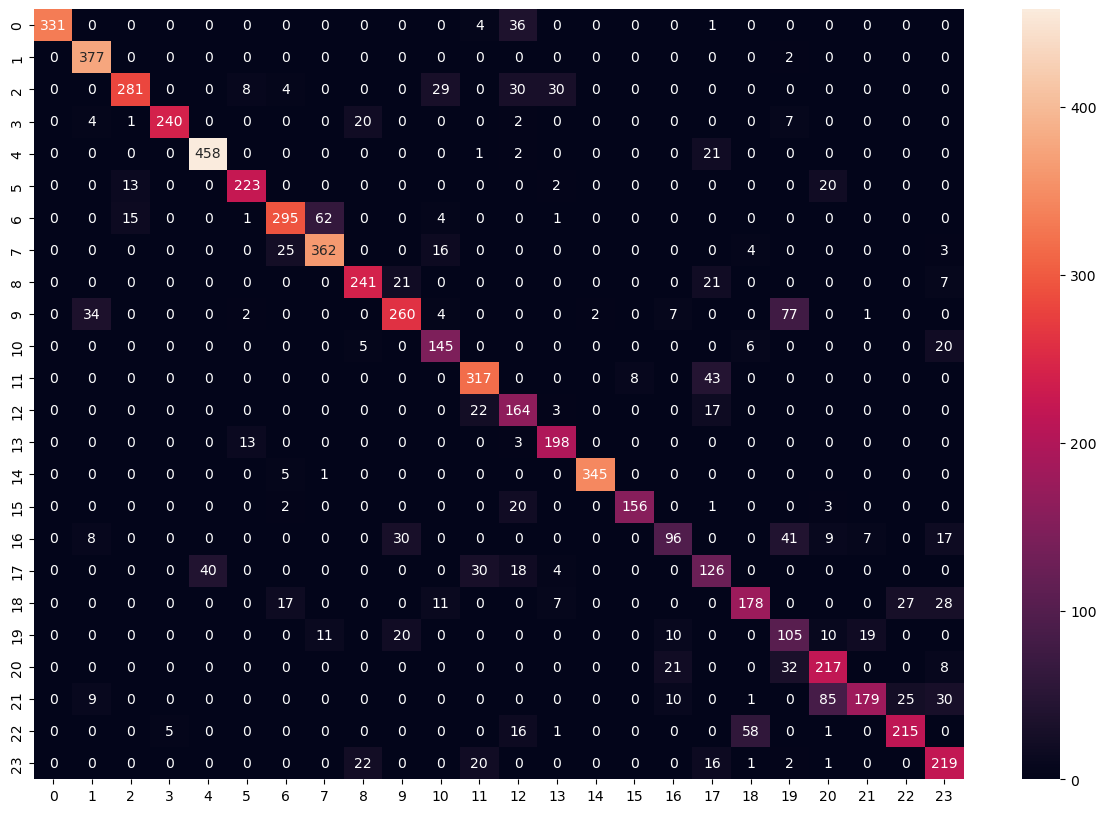

In [28]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_pred.argmax(axis=1),Y),annot=True,fmt='g')